In [2]:
import pandas as pd
merged_df_encoded = pd.read_csv('../../data/filtered_merged_encoded_data.csv')

Class distribution before SMOTE: HY_YN
0    18364
1     1529
Name: count, dtype: int64
Class distribution after SMOTE: HY_YN
0    18364
1    18364
Name: count, dtype: int64

Logistic Regression Model Evaluation (with SMOTE):
Accuracy: 0.8809811017289908

Confusion Matrix:
 [[4313  279]
 [ 313   69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      4592
           1       0.20      0.18      0.19       382

    accuracy                           0.88      4974
   macro avg       0.57      0.56      0.56      4974
weighted avg       0.88      0.88      0.88      4974

ROC-AUC Score: 0.7030984913439262


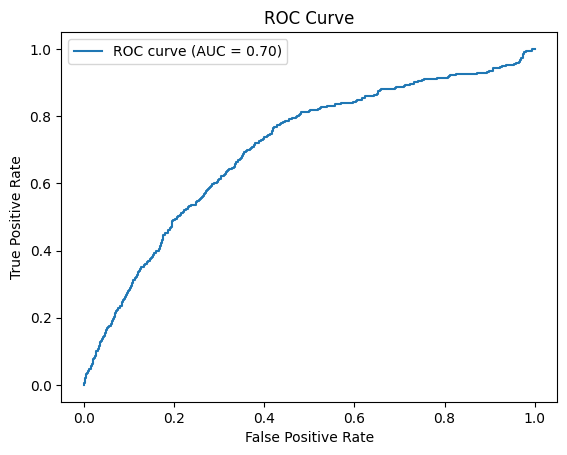

In [3]:
    # Import necessary libraries
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
    from imblearn.over_sampling import SMOTE  # Import SMOTE
    import matplotlib.pyplot as plt

    # Load the dataset (ensure your processed DataFrame is named `merged_df_encoded`)
    X = merged_df_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
    y = merged_df_encoded['HY_YN']  # Define target variable

    # Split the data into training and testing sets with stratification
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Check the class distribution after SMOTE
    print("Class distribution before SMOTE:", y_train.value_counts())
    print("Class distribution after SMOTE:", y_train_resampled.value_counts())

    # Define and train the logistic regression model
    logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
    logistic_model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = logistic_model.predict(X_test)
    y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Display the evaluation results
    print("\nLogistic Regression Model Evaluation (with SMOTE):")
    print("Accuracy:", accuracy)
    print("\nConfusion Matrix:\n", conf_matrix)
    print("\nClassification Report:\n", class_report)
    print("ROC-AUC Score:", roc_auc)

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()


Logistic Regression Model Evaluation (with Borderline-SMOTE):
Accuracy: 0.6855649376759148

Confusion Matrix:
 [[3148 1444]
 [ 120  262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80      4592
           1       0.15      0.69      0.25       382

    accuracy                           0.69      4974
   macro avg       0.56      0.69      0.53      4974
weighted avg       0.90      0.69      0.76      4974

ROC-AUC Score: 0.7576835197110386


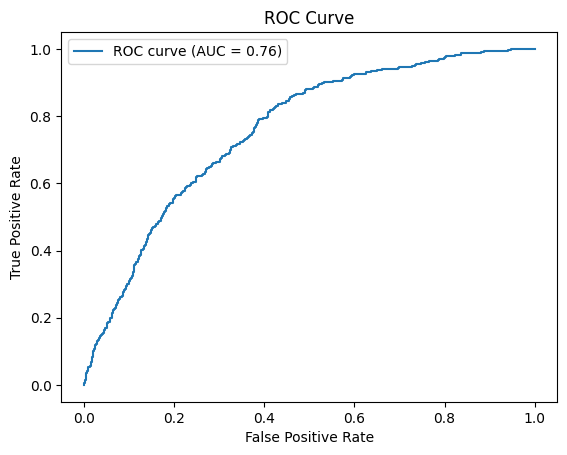

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt

# Load your preprocessed data (assuming `merged_df_encoded` is already encoded and cleaned)
X = merged_df_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
y = merged_df_encoded['HY_YN']  # Define target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training data
X_test_scaled = scaler.transform(X_test)        # Only transform the test data

# Apply Borderline-SMOTE on the scaled training data
borderline_smote = BorderlineSMOTE(random_state=42)
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train_scaled, y_train)

# Define and train the logistic regression model with balanced class weights
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)
y_pred_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class (1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation (with Borderline-SMOTE):")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Class distribution before SMOTEENN: HY_YN
0    18364
1     1529
Name: count, dtype: int64
Class distribution after SMOTEENN: HY_YN
1    18075
0    11956
Name: count, dtype: int64

Logistic Regression Model Evaluation (with SMOTEENN):
Accuracy: 0.839967832730197

Confusion Matrix:
 [[4044  548]
 [ 248  134]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91      4592
           1       0.20      0.35      0.25       382

    accuracy                           0.84      4974
   macro avg       0.57      0.62      0.58      4974
weighted avg       0.88      0.84      0.86      4974

ROC-AUC Score: 0.7183857197584691


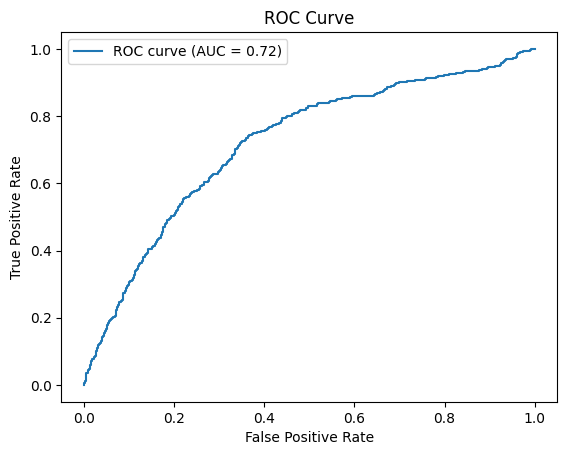

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN  # Import SMOTEENN
import matplotlib.pyplot as plt

# Load the dataset (ensure your processed DataFrame is named `merged_df_encoded`)
X = merged_df_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
y = merged_df_encoded['HY_YN']  # Define target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to the training data only
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Check the class distribution after SMOTEENN
print("Class distribution before SMOTEENN:", y_train.value_counts())
print("Class distribution after SMOTEENN:", y_train_resampled.value_counts())

# Define and train the logistic regression model
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)
logistic_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation (with SMOTEENN):")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters from Grid Search: {'C': 0.1, 'solver': 'newton-cg'}

Logistic Regression Model Evaluation (after Hyperparameter Tuning):
Accuracy: 0.8331322878970647

Confusion Matrix:
 [[4002  590]
 [ 240  142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91      4592
           1       0.19      0.37      0.25       382

    accuracy                           0.83      4974
   macro avg       0.57      0.62      0.58      4974
weighted avg       0.89      0.83      0.86      4974

ROC-AUC Score: 0.7211996278526734


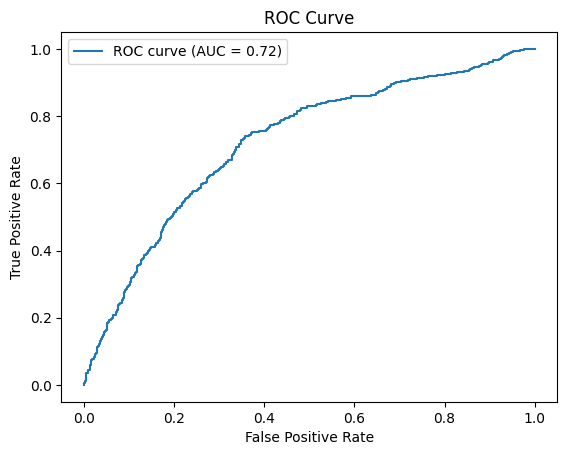

In [8]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN  # For resampling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define features (X) and target (y)
X = merged_df_encoded.drop(columns=['HY_YN'])  # Drop target variable from features
y = merged_df_encoded['HY_YN']  # Define target variable

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTEENN to the training data only
smoteenn = SMOTEENN(random_state=42)
X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

# Set up the parameter grid for logistic regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],        # Regularization strengths to try
    'solver': ['liblinear', 'saga', 'newton-cg'] # Solvers to try
}

# Initialize the logistic regression model with class weight balancing
logistic_model = LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters from Grid Search:", best_params)

# Evaluate the tuned model on the test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class (1)

# Model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Display the evaluation results
print("\nLogistic Regression Model Evaluation (after Hyperparameter Tuning):")
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("ROC-AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
